<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
<div dir=ltr>



____

# Rules
- Make sure that all of your cells can be run perfectly.
-Do not change the Parts which are not marked with #TODO
-Complete the functions or parts that are marked with #TODO
-Feel free to add functions if you need!

## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq

# Uninformed & Informed Search

## Problem Definition

In This Problem, We want to investigate Maze Problem with the focus on implementing BFS,DFS and A-Star algorithm to solve it. This notebook is inspired by the [pacman](https://freepacman.org/) game. We generate a random maze and put the pacman in the top left crner and the food in the bottom right corner. The goal is to find a way from the pacman to the food using different search algorithms.



## Code

In [ ]:
def generate_maze(rows, cols, wall_prob=0.3):
    np.random.seed(40)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, start, goal

def plot_maze(maze, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray")
    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='green', s=100, label='Food')  # Food
    plt.legend()
    plt.show()

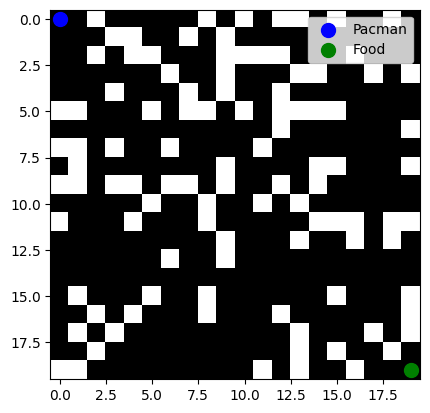

In [ ]:
rows, cols = 20, 20
maze, start, goal = generate_maze(rows, cols)
plot_maze(maze, start=start, goal=goal)


In [ ]:
class SearchAlgorithm:
    def __init__(self, maze):
        self.maze = maze
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors


In [ ]:
def plot_algorithm(maze, start, goal,name,algorithm):
  path = algorithm.search(start, goal)
  result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes}
  print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}")
  plot_maze(maze, path, start, goal)



In [ ]:
class DFS(SearchAlgorithm):
    def search(self, start, goal):
        stack = [(start, [start])]
        self.visited[start] = 1

        while stack:
            current_pos, path = stack.pop()
            if current_pos == goal:
                return path  #check for the goal
            self.expanded_nodes += 1
            for neighbor in self.get_neighbors(current_pos):
                if not self.visited[neighbor]:
                    self.visited[neighbor] = 1
                    stack.append((neighbor, path + [neighbor]))  #Adding neighbor

        return None  #when no path is found

DFS: Expanded Nodes = 180


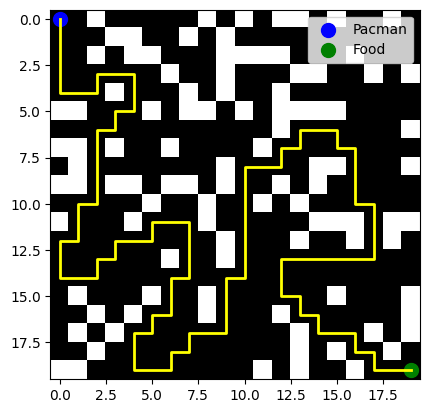

In [ ]:
plot_algorithm(maze,start,goal,'DFS', DFS(maze))

In [ ]:
class BFS(SearchAlgorithm):
    def search(self, start, goal):
        queue = deque([(start, [start])])  #use deque to use popleft()
        self.visited[start] = 1

        while queue:
            current_pos, path = queue.popleft()  #first in, first out
            if current_pos == goal:
                return path  #check for the goal
            self.expanded_nodes += 1
            for neighbor in self.get_neighbors(current_pos):
                if not self.visited[neighbor]:
                    self.visited[neighbor] = 1
                    queue.append((neighbor, path + [neighbor]))  #Adding neighbor
        return None  #when no path is found

BFS: Expanded Nodes = 279


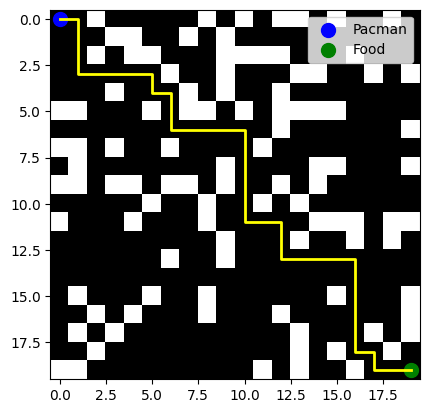

In [ ]:
plot_algorithm(maze,start,goal,'BFS', BFS(maze))

Question:

So far, we have explored three uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).

---

**Answer:**

DFS typically uses less memory compared to BFS, as it only needs to store the current path and backtrack when necessary. It only maintains a stack of nodes to explore, which can be much smaller than a queue of nodes in BFS.
If the goal is deep within the maze and located early along a specific path, DFS may reach the solution faster than BFS because it dives into a path as far as possible before backtracking. DFS can be time-efficient for deep solutions but will take longer if the solution is near the start or located on a different branch than the one DFS is initially exploring. It has a smaller memory footprint, as it only needs to keep track of the current branch, unlike BFS which stores all nodes level-by-level.

On the other hand, BFS explores all nodes level by level. It guarantees that when it finds the goal, it will be through the shortest path (in terms of steps or edges), which is especially important in a maze where shorter paths are desirable. BFS doesn’t get stuck in deep paths or branches. It explores all directions evenly, ensuring a more uniform search, which is especially useful in mazes with many dead ends. BFS can be slower when the goal is far away, but it will efficiently find the shortest path to the goal. It may take longer if there are many nodes to explore at each level. It consumes more memory since it needs to store all the nodes at a given level before moving on to the next level. This can become problematic in very large mazes.

---

In [ ]:
class AStar(SearchAlgorithm):
    def heuristic(self, pos, goal):
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1]) #manhattan distance

    def search(self, start, goal):
        pq = [(0, start, [start])]  #priority, position, path
        g_x = {start : 0}
        self.visited[start] = 1

        while pq:
            current_priority, current_position, path = heapq.heappop(pq) #find lowest f(x)
            if current_position == goal:
                return path  #check for the goal

            self.expanded_nodes += 1

            for neighbor in self.get_neighbors(current_position):
                potential_g_x = g_x[current_position] + 1  #all costs are 1
                if neighbor not in g_x or potential_g_x < g_x[neighbor]:
                    g_x[neighbor] = potential_g_x
                    f_cost = potential_g_x + self.heuristic(neighbor, goal)
                    heapq.heappush(pq, (f_cost, neighbor, path + [neighbor]))  #update
                    self.visited[neighbor] = 1
        return None  #when no path is found

A*: Expanded Nodes = 168


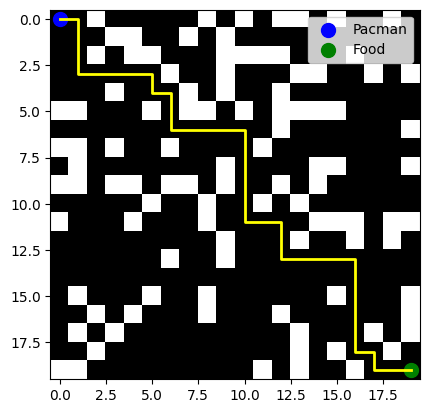

In [ ]:
plot_algorithm(maze,start,goal,'A*', AStar(maze))

Question:

Explain your heuristic and observation's result. Also, compare the A* method with Uniformed search in the context of the Maze problem.

---

**Answer:**

The heuristic used in the A* algorithm is the Manhattan Distance, which is defined as:

$h(x)=|x_1-x_2|+|y_1-y_2|$

A* quickly finds the shortest path to the goal by combining actual movement costs with the heuristic, directing the search toward the goal. It expands fewer nodes compared to uninformed search methods like BFS because the heuristic helps prioritize nodes that are closer to the goal, reducing unnecessary exploration in irrelevant areas of the maze.

A* is generally more efficient than BFS because it uses the heuristic to focus on nodes that are likely closer to the goal. BFS explores all nodes level by level, even if many of them are far from the goal, leading to more expanded nodes. Both A* and BFS guarantee the shortest path, but BFS does so at the cost of exploring many unnecessary nodes, while A* directs its search intelligently. A* can be more memory-efficient in certain cases because it doesn’t need to store all nodes at the current level, like BFS. However, in some large or complex mazes, the priority queue in A* can grow significantly, especially if the heuristic isn’t strong enough.

A* always finds the shortest path, while DFS does not guarantee it. DFS might return a much longer path, especially if the goal is located in a different branch of the maze. DFS can be faster for deep solutions but lacks the directionality of A*. It blindly follows one path as far as possible, which can be inefficient in wide mazes. A* balances depth and breadth by intelligently choosing the next node to explore. DFS typically has the smallest memory footprint because it only tracks the current path and backtracks when necessary. A* uses more memory to maintain its priority queue and track all explored paths.

---


Now we want to explore a situation where each cell of the maze has an entrance cost, which means in order to enter that cell we must pay a fixed price. you should implement the above search algorithms with the least payed cost.

In [ ]:
def generate_maze_with_costs(rows, cols, wall_prob=0.3):
    np.random.seed(137)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    costs = np.random.randint(1, 11, size=(rows, cols))
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, costs, start, goal

def plot_maze_with_costs(maze, costs, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray", vmin=0, vmax=1)

    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                cl = 'red' if costs[i,j] > 6 else ('green' if costs[i,j] < 4 else 'orange')
                plt.text(j, i, str(costs[i, j]), ha='center', va='center', color=cl, fontsize=8)

    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='pink', s=100, label='Food')  # Food
    plt.legend()
    plt.show()


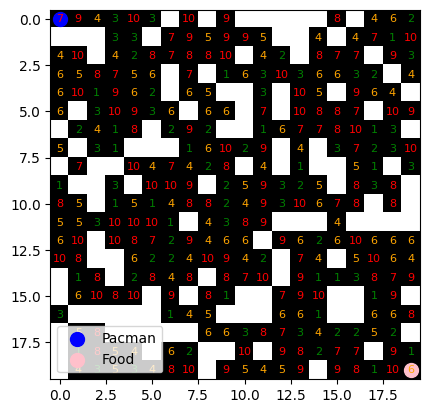

In [ ]:
rows, cols = 20, 20
maze, costs, start, goal = generate_maze_with_costs(rows, cols)
plot_maze_with_costs(maze, costs, start=start, goal=goal)

In [ ]:
# Search Algorithms
class SearchAlgorithmWithCosts:
    def __init__(self, maze, costs):
        self.maze = maze
        self.costs = costs
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors

    def calculate_total_cost(self, path):
        return sum(self.costs[pos] for pos in path)



In [ ]:
def plot_algorithms_with_costs(maze, costs, start, goal,name,algorithm):
    path, total_cost = algorithm.search(start, goal)
    result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes, 'total_cost': total_cost}
    print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}, Total Cost = {total_cost}")
    plot_maze_with_costs(maze, costs, path, start, goal)


In [ ]:
class DFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        stack = [(start, [start], self.costs[start])]  #position, path, total cost
        self.visited[start] = 1
        best_path = None
        best_cost = float('inf')

        while stack:
            current_position, current_path, current_cost = stack.pop()
            self.expanded_nodes += 1
            if current_position == goal:
                if current_cost < best_cost:
                    best_cost = current_cost
                    best_path = current_path
                continue
            for neighbor in self.get_neighbors(current_position):
                new_cost = current_cost + self.costs[neighbor]
                if new_cost < best_cost:
                    self.visited[neighbor] = 1
                    stack.append((neighbor, current_path + [neighbor], new_cost))
        return best_path, best_cost

DFS: Expanded Nodes = 268, Total Cost = 722


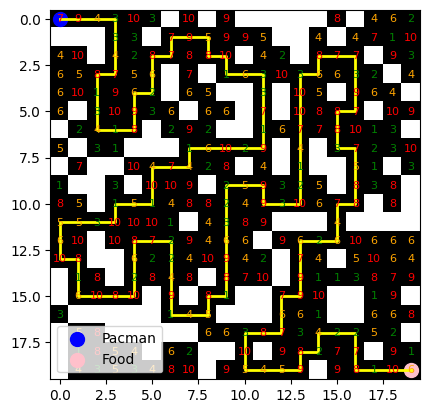

In [ ]:
plot_algorithms_with_costs(maze, costs, start, goal,'DFS',DFSWithCosts(maze,costs))

In [ ]:
class BFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        queue = deque([(start, [start], self.costs[start])])  #position, path, total cost
        self.visited[start] = self.costs[start]
        best_path = None
        best_cost = float('inf')

        while queue:
            current_pos, current_path, current_cost = queue.popleft()
            self.expanded_nodes += 1
            if current_pos == goal:
                if current_cost < best_cost:
                    best_cost = current_cost
                    best_path = current_path
                continue
            for neighbor in self.get_neighbors(current_pos):
                new_cost = current_cost + self.costs[neighbor]
                if not self.visited[neighbor] or new_cost < self.visited[neighbor]:
                    self.visited[neighbor] = new_cost
                    queue.append((neighbor, current_path + [neighbor], new_cost))
        return best_path, best_cost

BFS: Expanded Nodes = 268, Total Cost = 232


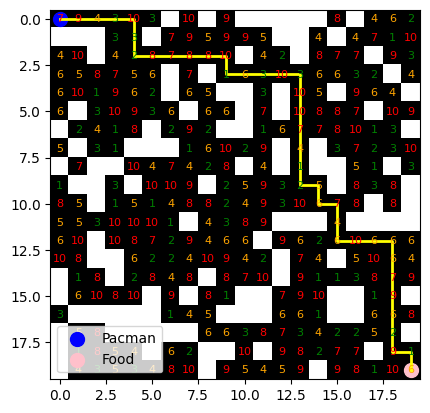

In [ ]:
plot_algorithms_with_costs(maze, costs, start, goal,'BFS',BFSWithCosts(maze,costs))

In [ ]:
class AStarWithCosts(SearchAlgorithmWithCosts):
    def heuristic(self, pos, goal):
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1]) #manhattan distance

    def search(self, start, goal):
        pq = [(self.costs[start] + self.heuristic(start, goal), self.costs[start], start, [start])] #f_cost, current_cost, position, path
        self.visited[start] = self.costs[start]
        best_path = None
        best_cost = float('inf')
        while pq:
            f_cost, current_cost, current_pos, current_path = heapq.heappop(pq)
            self.expanded_nodes += 1
            if current_pos == goal:
                if current_cost < best_cost:
                    best_cost = current_cost
                    best_path = current_path
                continue
            for neighbor in self.get_neighbors(current_pos):
                new_cost = current_cost + self.costs[neighbor]
                total_cost = new_cost + self.heuristic(neighbor, goal)
                if not self.visited[neighbor] or new_cost < self.visited[neighbor]: #here, we enqueue if it's either not visited or we've found a cheaper way
                    self.visited[neighbor] = new_cost
                    heapq.heappush(pq, (total_cost, new_cost, neighbor, current_path + [neighbor]))
        return best_path, best_cost

A*: Expanded Nodes = 268, Total Cost = 177


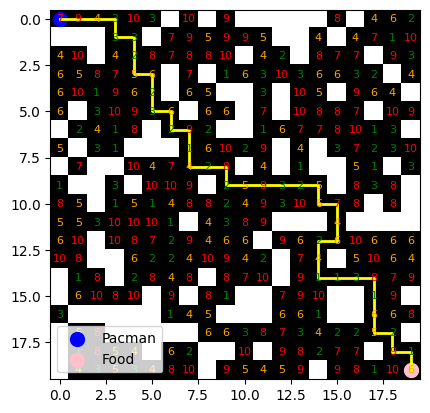

In [ ]:
plot_algorithms_with_costs(maze, costs, start, goal,'A*',AStarWithCosts(maze,costs))

Question:

now that you have explored these methods(DFS, BFS,A star) in priced manner, Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations.

---

**Answer:**

DFS is simple but tends to explore paths blindly without considering cost, leading to suboptimal solutions.
BFS guarantees an optimal solution for minimal steps but doesn't account for varying costs efficiently, which can lead to exploring unnecessary paths.
A* is the most efficient in terms of finding the least costly path, using a balance of actual and estimated costs to guide its search.

In terms of performance, DFS expands fewer nodes in some cases but often returns a suboptimal path.
BFS expands more nodes due to its level-wise exploration but guarantees an optimal solution in terms of steps.
A* is the most cost-effective and optimal, expanding fewer nodes than BFS by intelligently using the heuristic to guide the search towards the goal.

---